## Exploratory Data Analysis
_________________________________________________


In [3]:
# Importing Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing dependencies for vectorization and ML/DL
import tensorflow as tf
import gensim
from gensim.utils import simple_preprocess
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Model
import sklearn as skl
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
import nltk
from sklearn.metrics import classification_report

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Reading cleaned file with text for model creation
news_csv = Path('/content/drive/MyDrive/nlp_cleaned_news.csv')
# news_csv = Path('nlp_cleaned_news.csv')
# news_csv = Path('/content/drive/MyDrive/Colab Notebooks/nlp_cleaned_news_test.csv')
news_df = pd.read_csv(news_csv)

In [6]:
news_df = news_df.drop(['Unnamed: 0'], axis=1)
news_df.head()

text  class
0  budget fight loom republicans flip fiscal scri...      1
1  military accept transgender recruit monday pen...      1
2  senior republican senator let mr mueller job w...      1
3  fbi russia probe help australian diplomat tip ...      1
4  trump want postal service charge amazon shipme...      1

In [7]:
news_df.dropna(inplace = True)
news_df.count()

text     44678
class    44678
dtype: int64

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Preperation for model training - NLTK

Ref to understand Vectorization techniques: https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

In [8]:
# Creating a list of words
list_of_words = []
for i in news_df.text:
    for j in i.split():
      list_of_words.append(j.strip())

# Total unique words
all_words = len(list(set(list_of_words)))
all_words

83945

In [9]:
# length of longest text
# Finding the maximum number of words in a row
maxlen = -1
for doc in news_df.text:
    tokens = nltk.word_tokenize(doc)
    if (maxlen < len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any row ", maxlen)

The maximum number of words in any row  4456


In [12]:
news_df['tokens'] = news_df['text'].apply(lambda x: x.split(' '))

In [13]:
news_df.head()

text  class  \
0  budget fight loom republicans flip fiscal scri...      1   
1  military accept transgender recruit monday pen...      1   
2  senior republican senator let mr mueller job w...      1   
3  fbi russia probe help australian diplomat tip ...      1   
4  trump want postal service charge amazon shipme...      1   

                                              tokens  
0  [budget, fight, loom, republicans, flip, fisca...  
1  [military, accept, transgender, recruit, monda...  
2  [senior, republican, senator, let, mr, mueller...  
3  [fbi, russia, probe, help, australian, diploma...  
4  [trump, want, postal, service, charge, amazon,...

In [14]:
# splitting training/test datasets

X_train, X_test, y_train, y_test = train_test_split(news_df["text"], news_df["class"], random_state=42)

In [15]:
# word tokenization
tokenizer = Tokenizer(num_words = all_words)
tokenizer.fit_on_texts(X_train)
train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

In [16]:
train_sequence

[[527,
  1346,
  31,
  923,
  873,
  1070,
  6293,
  1862,
  24,
  1072,
  3,
  3241,
  1346,
  140,
  31,
  923,
  873,
  723,
  1070,
  6293,
  1,
  59,
  527,
  340,
  4286,
  2206,
  426,
  1335,
  218,
  2301,
  1346,
  123,
  159,
  159,
  82,
  1862,
  3,
  1182,
  406,
  111,
  58,
  92,
  694,
  30,
  1,
  541,
  353,
  236,
  95,
  574,
  1,
  710,
  2095,
  50,
  6102,
  43,
  2759,
  1793,
  4286,
  2206,
  426,
  527,
  59,
  429,
  2034,
  391,
  4420,
  3661,
  873,
  428,
  78,
  426,
  527,
  248,
  873,
  864,
  9125,
  546,
  156,
  1070,
  471,
  292,
  343,
  86,
  360,
  873,
  1070,
  4033,
  268,
  923,
  773,
  239,
  38,
  1346,
  1,
  133,
  66,
  3849,
  20,
  741,
  428,
  221,
  6235,
  1004,
  1070,
  643,
  873,
  835,
  12,
  153,
  151,
  1411,
  527,
  808,
  2816,
  2346,
  873,
  2379,
  437,
  473,
  30,
  868,
  426,
  991,
  10082,
  198,
  1346,
  406,
  1,
  127,
  36,
  450,
  554,
  218,
  43,
  516,
  952,
  941,
  3,
  2541,
  273,
  1092,


In [17]:
# Padding
pad_train = pad_sequences(train_sequence, maxlen = 4420, padding = 'post', truncating = 'post' )
pad_test = pad_sequences(test_sequence, maxlen = 4420, padding = 'post')

In [18]:
pad_train[0]

array([ 527, 1346,   31, ...,    0,    0,    0], dtype=int32)

In [19]:
# Building the LSTM Model
model1 = Sequential()
model1.add(Embedding(all_words, output_dim = 256))
model1.add(Bidirectional(LSTM(128)))
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(64, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         21489920  
                                                                 
 bidirectional (Bidirection  (None, 256)               394240    
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21925377 (83.64 MB)
Trainable params: 21925377 (83.64 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [20]:
# Compiling the model
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Model training
history = model1.fit(pad_train, y_train, validation_split=0.2, epochs=2, batch_size=64, shuffle=True, verbose = 1)

Epoch 1/2
419/419 [==============================] - 218s 497ms/step - loss: 0.0416 - accuracy: 0.9818 - val_loss: 0.0051 - val_accuracy: 0.9990
Epoch 2/2
419/419 [==============================] - 202s 481ms/step - loss: 8.2417e-04 - accuracy: 0.9998 - val_loss: 0.0056 - val_accuracy: 0.9987


In [22]:
model_loss, model_accuracy = model1.evaluate(pad_test,y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

350/350 - 37s - loss: 0.0060 - accuracy: 0.9986 - 37s/epoch - 107ms/step
Loss: 0.006011468358337879, Accuracy: 0.9985675811767578


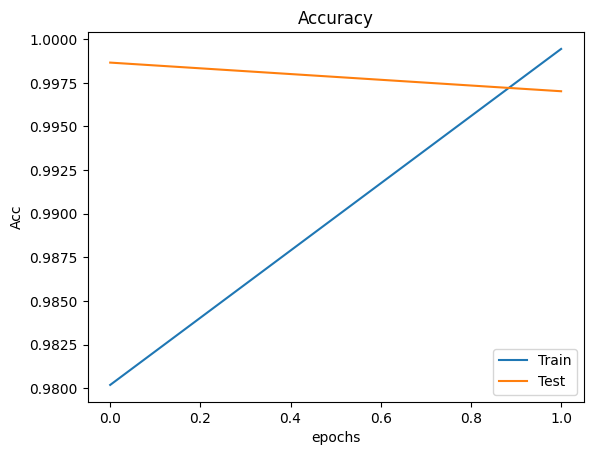

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

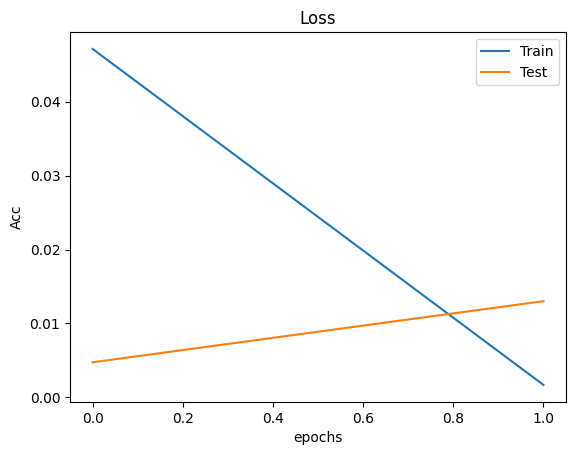

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [23]:
pred = model1.predict(pad_test)
print(classification_report(y_test, pred, target_names = ['Fake','Real']))

350/350 [==============================] - 38s 106ms/step


ValueError: ignored

In [24]:
import pickle
filename = 'model1.sav'
pickle.dump(model1, open(filename, 'wb'))


In [25]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

loaded_model.predict(X_test)

AttributeError: ignored

### Data Preperation for model training - Vectorization using Word2Vec